# TMDB Dataset Analyzation:
Analyzing TMDB dataset to answer three quations:
1. Which genres are more common?
2. Which genre (on average) cost more to produce?
3. Which genre (on average) generates more revenue?

In [1]:
#import libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
# loading the data to a DataFrame
df_moves = pd.read_csv('tmdb-movies.csv')



# Data Understanding



In [3]:

df_moves.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# printing the number of rows and columns
print(f'the dataframe has {df_moves.shape[0]} rows and {df_moves.shape[1]} columns')

the dataframe has 10866 rows and 21 columns


In [5]:
#Use .info() and .describe() to get some insights:
print(df_moves.info())
print(df_moves.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

# Data Preparation:


In [6]:
#Removing unwanted columns

df_moves = df_moves.drop(['homepage', 'tagline', 'overview', 'imdb_id',  'keywords', 'cast', 'production_companies'], axis=1)


In [7]:
# Converting release_date from a string to datetime object

df_moves['release_date'] = df_moves['release_date'].apply(pd.to_datetime)


In [8]:
# Calculating the number of missing valuse in the dataset

df_moves.isnull().sum()


id                 0
popularity         0
budget             0
revenue            0
original_title     0
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [9]:
# Dropping null values
df_moves.dropna(inplace=True)

In [10]:
# Calculating the number of duplicated rows
df_moves.duplicated().sum()

1

In [11]:
#dropping diplicated rows
df_moves.drop_duplicates(inplace=True)

In [12]:
#splitting genres column
get_first_genre = lambda x: x.split('|')[0]

df_moves['genres'] = df_moves['genres'].apply(get_first_genre)



## Question 1: Which Genres are more common?


Increasing the plot size to improve readability 

In [13]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 9, 6

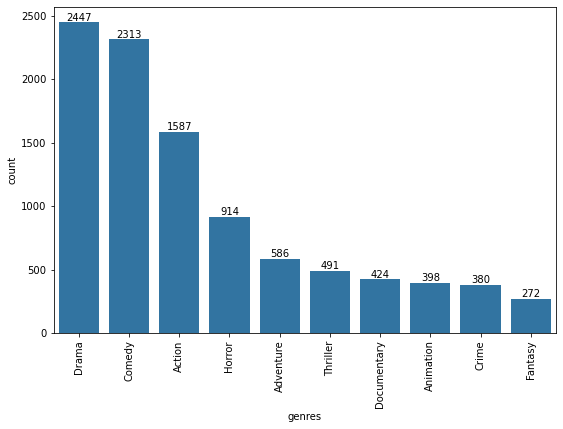

In [14]:
# crating a barplot for the number of movies per genre

genres = df_moves['genres'].value_counts()
base_color = sns.color_palette()[0]
genres_order = genres.iloc[:10].index # to plot only the top 10 genres
sns.countplot(data=df_moves, x='genres', color=base_color, order=genres_order);

locs, labels = plt.xticks(rotation=90)

for loc, label in zip(locs, labels):
    count = genres[label.get_text()]
    pct_string = f'{count}'

    plt.text(loc, count+15,pct_string, ha='center', color='black')



In [15]:
genres

Drama              2447
Comedy             2313
Action             1587
Horror              914
Adventure           586
Thriller            491
Documentary         424
Animation           398
Crime               380
Fantasy             272
Science Fiction     212
Romance             185
Family              142
Mystery             125
Music                96
TV Movie             74
War                  59
History              44
Western              42
Foreign               9
Name: genres, dtype: int64

### Finding: 
Drama moves are more commonly produce folowed by comedy, action and the rest.

## Question 2: Which genre (on average) cost more to produce?

In [16]:

def get_list_df_types(df, col):
    '''
    INPUT:
    df - dataframe
    col - string of targeted column name 

    OUTPUT:
    list_df - list of dataframes each one contaning only one value of the targeted column
    types - list of all the valus in the column
    
    '''
    types = df[col].value_counts().index # list of all the types in col

    list_df = []

    for type in types:
        list_df.append(df[df[col] == type])

    return types, list_df
    

get_average_budget = lambda c: c.budget.mean() # takes a df as an input and return the budget mean



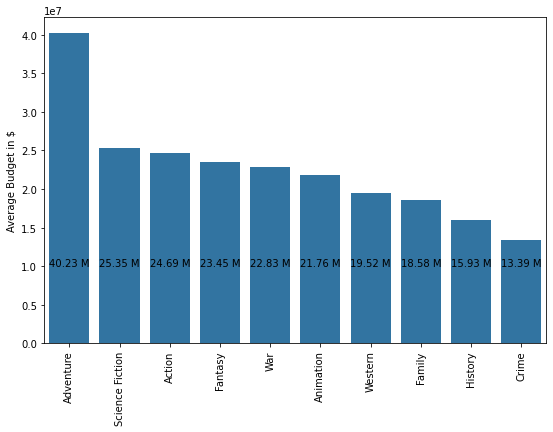

In [17]:
types, list_df_genres = get_list_df_types(df_moves, 'genres')
aves = dict() # {genre: budget mean}

# populating aves dict
for df, type in zip(list_df_genres, types):
    aves[type] = get_average_budget(df)

# covering dict to a pandas series
budget_serie = pd.Series(aves)
budget_serie.sort_values(ascending=False, inplace=True)

# creating a barplot using buget_seris

sns.barplot(x=budget_serie.index[:10], y=budget_serie.values[:10], color=base_color)


# changing the y axis to dollars
plt.ylabel('Average Budget in $')

locs, labels = plt.xticks(rotation=90)

for loc, label in zip(locs, labels):
    bud = int(budget_serie[label.get_text()])/1e6
    
    pct_string = f'{bud:.2f} M'

    plt.text(loc, bud+1e7,pct_string, ha='center', color='black')




In [18]:
budget_serie

Adventure          4.023351e+07
Science Fiction    2.534840e+07
Action             2.469309e+07
Fantasy            2.344872e+07
War                2.283407e+07
Animation          2.176240e+07
Western            1.951699e+07
Family             1.857668e+07
History            1.593452e+07
Crime              1.338997e+07
Thriller           1.218484e+07
Romance            1.119186e+07
Music              1.096042e+07
Comedy             1.040549e+07
Drama              1.034984e+07
Mystery            1.010633e+07
Horror             5.623481e+06
Documentary        4.386027e+05
TV Movie           2.635135e+05
Foreign            0.000000e+00
dtype: float64

### Findings:


Adventure moves have significantly more budget (40.23 million dollars) then other genres. Foreign films do not have a budget entry on the dataset.

## Question3: Which genre (on average) generates more revenue?

In [19]:
get_average_revenue = lambda c: c.revenue.mean()  # takes a df as an input and return the revanue mean


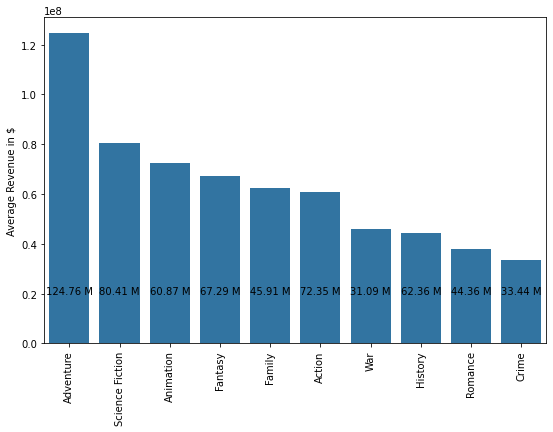

In [20]:
types, list_df_revenues = get_list_df_types(df_moves, 'genres')
aves_rev = dict() # {genre: budget mean}

# populating aves dict
for df, type in zip(list_df_revenues, types):
    aves_rev[type] = get_average_revenue(df)

# covering dict to a pandas series
revenue_serie = pd.Series(aves_rev)
revenue_serie.sort_values(ascending=False, inplace=True)

# creating a barplot using buget_seris

sns.barplot(x=revenue_serie.index[:10], y=revenue_serie.values[:10], color=base_color)
locs, label = plt.xticks(rotation=90)

# $nnn.nn Million


# changing the y axis to dollars
plt.ylabel('Average Revenue in $')


for loc, label in zip(locs, labels):
    rev = int(revenue_serie[label.get_text()])/1e6
    
    pct_string = f'{rev:.2f} M'

    plt.text(loc, bud+2e7,pct_string, ha='center', color='black')

In [21]:
revenue_serie

Adventure          1.247560e+08
Science Fiction    8.040755e+07
Animation          7.235439e+07
Fantasy            6.729393e+07
Family             6.235530e+07
Action             6.087339e+07
War                4.590766e+07
History            4.436062e+07
Romance            3.809129e+07
Crime              3.343632e+07
Western            3.109095e+07
Comedy             2.937850e+07
Thriller           2.648324e+07
Drama              2.520119e+07
Mystery            2.415905e+07
Music              2.400642e+07
Horror             1.688471e+07
Documentary        2.009933e+06
TV Movie           5.675676e+05
Foreign            0.000000e+00
dtype: float64

### Finding:


Adventure moves generate significantly more revenue(124.76 million dollars) then other genres. Foreign films do not have a revenue entry on the dataset.

# Conclusion:

- Drama moves are more commonly produce folowed by comedy, action and the rest.
- Adventure moves have significantly more budget (40.23 million dollars) then other genres.
- Adventure moves generate 124.76 million dollars in revenue aproxmitly 40 million more then other genres.

In [22]:
#export the dataframe to csv file:
df_moves.to_csv('move_df.csv', index=False)